# Unveiling the Impact: Price Sensitivity and Customer Attrition in a Power Generation Company

## Exploratory Data Analysis


### Unveiling the Clues: Exploratory Data Analysis for Churn Model Development

**Background Information**

The BCG project team recognizes the potential of developing a churn model to explore the impact of price sensitivity on customer attrition. In pursuit of this objective, the client has entrusted us with the task of conducting an exploratory data analysis (EDA) to glean insights from the provided data.

The dataset furnished by the client comprises the following key components:

1. Historical Customer Data: This treasure trove of information encompasses various customer attributes such as usage patterns, sign-up dates, forecasted usage, and more. Analyzing this data will help us unravel patterns, uncover customer behavior nuances, and potentially identify predictors that contribute to churn.

2. Historical Pricing Data: This dataset holds a wealth of details regarding variable and fixed pricing structures, among other pertinent information. By examining pricing dynamics and their relationship with churn, we can discern whether price sensitivity significantly impacts customer attrition.

3. Churn Indicator: A crucial element of the dataset is the churn indicator, which flags whether a customer has churned or not. This binary indicator serves as the foundation for our churn model development, enabling us to identify patterns associated with customer attrition.

With this comprehensive dataset at our disposal, we embark on the exciting journey of exploratory data analysis. Our goal is to uncover meaningful insights, establish correlations, and pave the way for developing a robust churn model that unravels the complex interplay between price sensitivity and customer attrition.

By harnessing the power of data exploration, we strive to provide our client with actionable insights that will inform strategic decisions, empower customer retention efforts, and unlock opportunities to optimize pricing strategies. Let us now delve into the data, extract its hidden stories, and uncover the clues that will drive our pursuit of churn model development.

# Task 
----
1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation

### Import Packages

In [2]:
# load packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

### Load data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. 

In [3]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [4]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


### client_data.csv

*	id = client company identifier

* activity_new = category of the company’s activity

*	channel_sales = code of the sales channel

*	cons_12m = electricity consumption of the past 12 months

*	cons_gas_12m = gas consumption of the past 12 months

*	cons_last_month = electricity consumption of the last month

*	date_activ = date of activation of the contract

*	date_end = registered date of the end of the contract

*	date_modif_prod = date of the last modification of the product

*	date_renewal = date of the next contract renewal

*	forecast_cons_12m = forecasted electricity consumption for next 12 months

*	forecast_cons_year = forecasted electricity consumption for the next calendar year

*	forecast_discount_energy = forecasted value of current discount

*	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

*	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

*	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

*	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

*	has_gas = indicated if client is also a gas client

*	imp_cons = current paid consumption

*	margin_gross_pow_ele = gross margin on power subscription

*	margin_net_pow_ele = net margin on power subscription

*	nb_prod_act = number of active products and services

*	net_margin = total net margin

*	num_years_antig = antiquity of the client (in number of years)

*	origin_up = code of the electricity campaign the customer first subscribed to

*	pow_max = subscribed power

*	churn = has the client churned over the next 3 months



### Descriptive statistics of data

#### Data types

Before transforming and engineering features, it is important to gain a comprehensive understanding of the data at hand, including the data types associated with each column. The types of data present can have an impact on the necessary transformations and feature engineering techniques employed. To obtain an overview of the data types within a data frame, the info() method can be utilized.

In [63]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  int32         
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

Convert the four date-related features from the object data type to the datetime data type.

In [6]:
# convert datetime feature to datetime data type
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[f] = pd.to_datetime(client_df[f])

In [7]:
# Add some new features to the above datetime features
client_df['contract_start_year'] = client_df['date_activ'].dt.year
client_df['contract_end_year'] = client_df['date_end'].dt.year

#### Perform a check for missing values and duplicate records.

In [8]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
contract_start_year               0
contract_end_year           

In [9]:
client_df.duplicated().sum()

0

In [10]:
client_df.shape

(14606, 28)

There are no missing values or duplicate rows present in the data.

#### Check for consistency of features' values.

In [11]:
# 
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

There seems to be consistency issues in the categorical variables.

In [12]:
describe_categorical(dataset=client_df)

Categorical variables are ['id', 'channel_sales', 'has_gas', 'origin_up'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns] 
--------------------------------------------------------------------------------
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413

Since the values in the "channel_sales" and "origin_up" features are not easily interpretable, we will convert these features into numeric data type using label encoding.

In [13]:
# label encoding
channel_encoder = LabelEncoder()
client_df['channel_sales'] = channel_encoder.fit_transform(client_df['channel_sales'])
origin_encoder = LabelEncoder()
client_df['origin_up'] = origin_encoder.fit_transform(client_df['origin_up'])

In [14]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,2,19.800,0,2010,2016


#### Perform a check on the numeric features.

In [15]:
# dataset: a pandas dataframe;
def describe_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int64'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int_columns)!=0:    
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        # 
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    else:
        print('There is no numeric variables in the dataset')

There are no issues with the numeric features.

In [16]:
describe_numeric(dataset=client_df)

Numeric variables are ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig', 'churn', 'contract_start_year', 'contract_end_year', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'] 
       cons_12m  count  proportion
0             0    117    0.008010
1       2882597     27    0.001849
2       3329244     24    0.001643
3       1743025     18    0.001232
4       3926060     18    0.001232
...         ...    ...         ...
11060     10297      1    0.000068
11061     10305      1    0.000068
11062     10311      1    0.000068
11063     10312      1    0.000068
11064     14285      1    0.000068

[11065 rows x 3 columns] 
--------------------------------------------------------------------------------
      cons_gas_12m  count  proportion


**Perform a check on the date time features.**

In [17]:
client_df[client_df.dtypes[client_df.dtypes=='datetime64[ns]'].index.tolist()].describe(datetime_is_numeric=True)

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


There are no issues with the date time features.

**Let's view feature descriptions of the price dataset.**

### price_data.csv

*	id = client company identifier

*	price_date = reference date

*	price_off_peak_var = price of energy for the 1st period (off peak)

*	price_peak_var = price of energy for the 2nd period (peak)

*	price_mid_peak_var = price of energy for the 3rd period (mid peak)

*	price_off_peak_fix = price of power for the 1st period (off peak)

*	price_peak_fix = price of power for the 2nd period (peak)

*	price_mid_peak_fix = price of power for the 3rd period (mid peak)


In [18]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


#### Get the general information of Price data

In [20]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


**Convert datetime feature to datetime data type**

In [21]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

**Perform a check for missing values and duplicate records.**

In [22]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [23]:
price_df.duplicated().sum()

0

##### There are no missing or duplicates values in the price dataset.

In [24]:
price_df.shape

(193002, 8)

**Perform a check on the categorical time features.**

In [25]:
describe_categorical(dataset=price_df)

Categorical variables are ['id'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12    0.000062
1      ab07311332ad017c071947aa1747bf9e     12    0.000062
2      aab99b3be145225dbff8551b256da9e0     12    0.000062
3      aac9a198cee4c2eb9d975ca21b38f00b     12    0.000062
4      aacb5f6ab9d32c8cc9e58c505b028d24     12    0.000062
...                                 ...    ...         ...
16091  83cf18b07114e495ae8b7fb235e45ee2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns] 
--------------------------------------------------------------------------------


**Perform a check on the numerical features.**

In [26]:
describe_numeric(dataset=price_df)

Numeric variables are ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'] 
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000 
--------------------------------------------------------------------------------


**Perform a check on the date time features.**

In [27]:
price_df['price_date'].describe(datetime_is_numeric=True)

count                           193002
mean     2015-06-16 12:50:49.933161216
min                2015-01-01 00:00:00
25%                2015-04-01 00:00:00
50%                2015-07-01 00:00:00
75%                2015-10-01 00:00:00
max                2015-12-01 00:00:00
Name: price_date, dtype: object

There are no issues with the date features, numerical features and categorical features of the Price dataset.

### Data visualization on Client Data

Here are a few functions that can help you begin with visualizations.


In [28]:
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client_df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

    # plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)


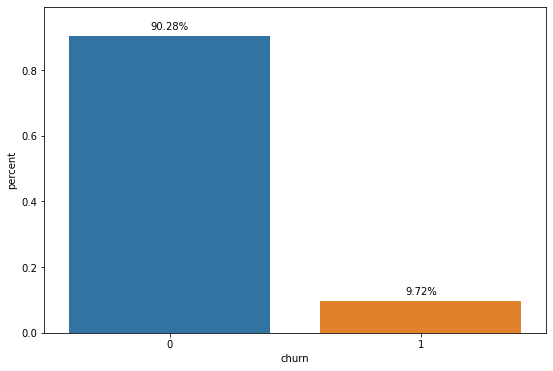

In [29]:
#display bar chart
plot_bar_chart_with_percent_label(df=client_df, target_variable='churn', gap_label_bar=0.02)

Based on the provided chart, approximately 9.72% of the customers transitioned to different power providers.

### Let's visualize categorical features' distribution. 

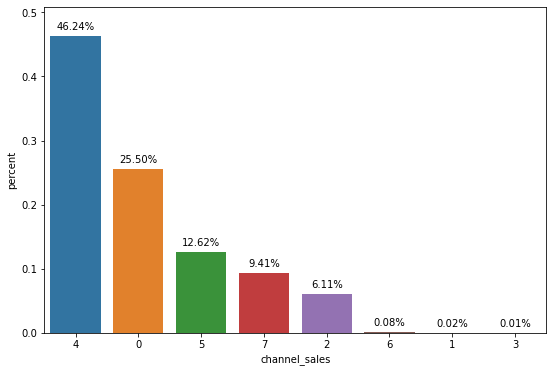

In [30]:
#plot channel sales distribution
plot_bar_chart_with_percent_label(df=client_df, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01)

According to this chart, Code 4 emerges as the most prevalent sales channel, while Code 1, 3, and 6 sales channels are infrequently utilized.

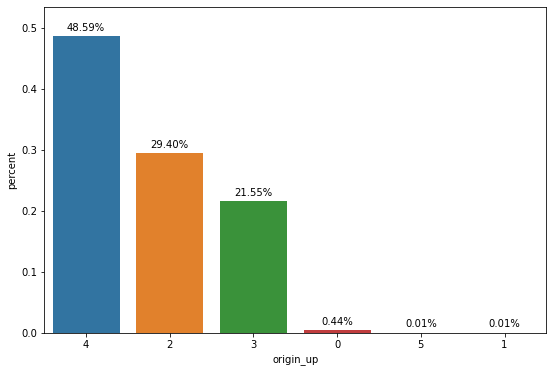

In [31]:
#plot distribution for origin_up
plot_bar_chart_with_percent_label(df=client_df, target_variable='origin_up', if_sort=True, gap_label_bar=0.01)

Based on this chart, Code 4 stands out as the most common electricity campaign that customers initially subscribe to. On the other hand, Code 0, 1, and 5 electricity campaigns have the lowest rates of initial subscription.

##### Plot stacked bar charts to show the feature distribution depicting the % of churning customers and non-churning customers.

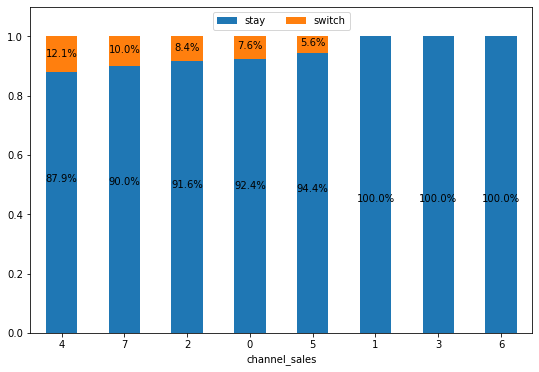

In [32]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='channel_sales', if_sort=True)

An analysis of customers across various sales channels reveals that the proportion of churned customers varies from 5.6% to 12.1%. Notably, channel four exhibits the highest percentage (12%) of customers who have churned.

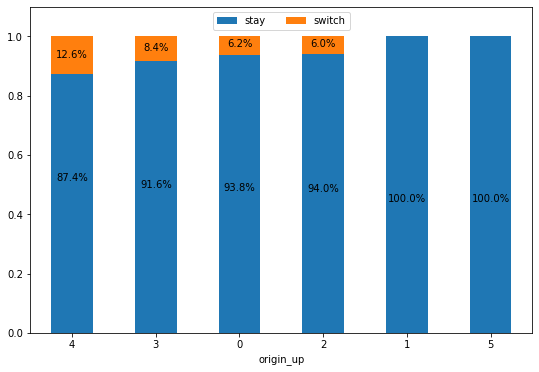

In [33]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='origin_up', if_sort=True)

The proportion of churning customers for customers that first subscribed to electricity campaign is 6.0% to 12.6% with the exception of campaign type 1 and 5.

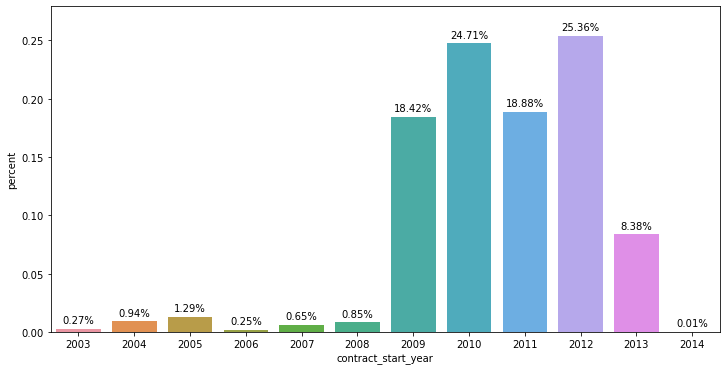

In [34]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

Based on the provided chart, the period between 2009 and 2013 witnessed the highest number of customer contract initiations.

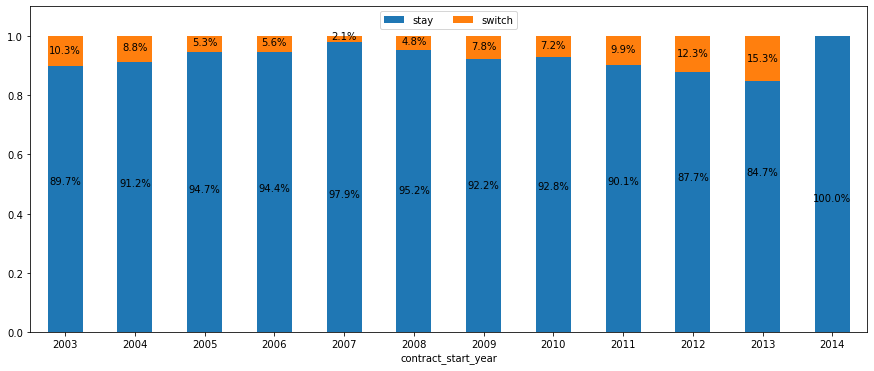

In [35]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='contract_start_year', if_sort=False, figsize=(15,6))

According to this chart, there was a consistent rise in the number of customers who were inclined to switch to other providers between the years 2011 and 2013.

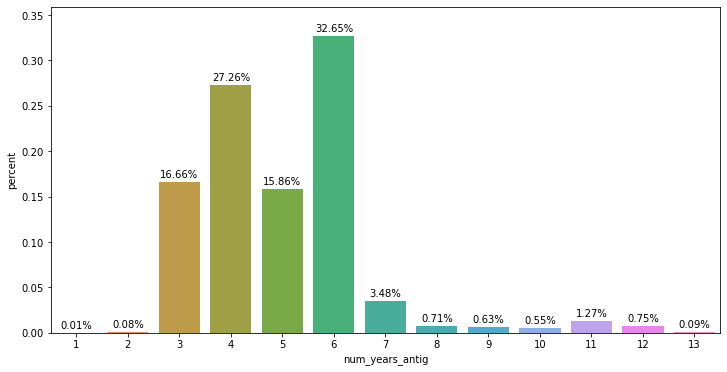

In [36]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

Based on the visual representation, it is evident that the majority of customers remained with the current provider for a period ranging from 3 to 6 years at the most.

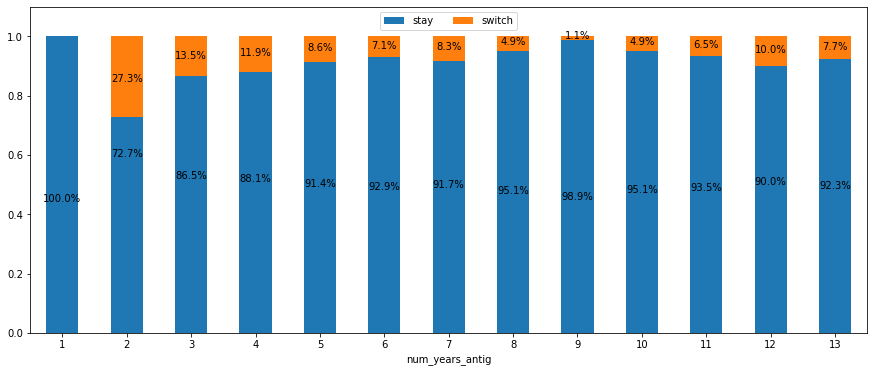

In [37]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='num_years_antig', if_sort=False, figsize=(15,6))

Based on the visual analysis of the client data, it appears that newer customers have a higher likelihood of switching to other providers.

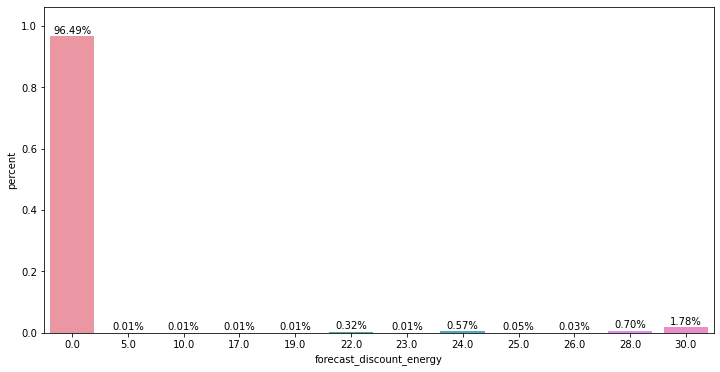

In [38]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='forecast_discount_energy', if_sort=False, gap_label_bar=0.01, figsize=(12,6))

An overview of the client data reveals that the forecasted value of the current discount is predominantly 0 for the majority of customers.



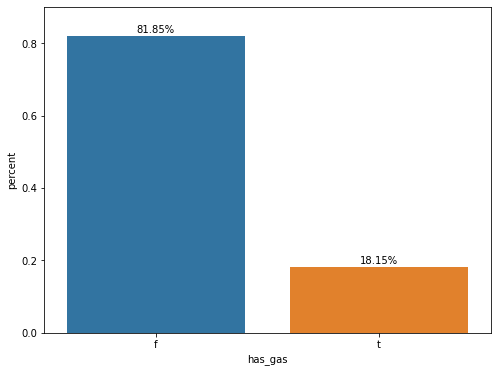

In [39]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='has_gas', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

Based on the visual analysis, it is apparent that a relatively small portion, specifically 18.15%, of the customer base were engaged in purchasing gas alongside their primary services.

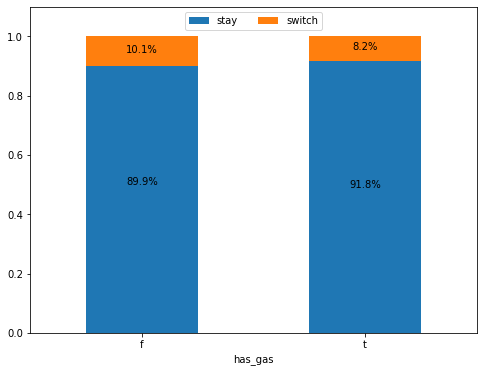

In [40]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='has_gas', if_sort=False, figsize=(8,6))

Based on the chart, it can be observed that customers who exclusively purchase electricity have a higher likelihood of switching providers compared to those who purchase both gas and electricity. This is evident from the recorded value of 10%.

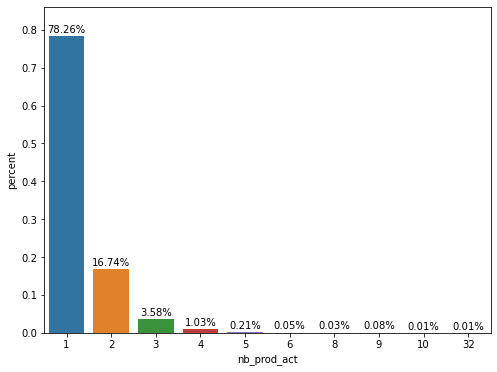

In [41]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

Based on the values depicted in the chart, it is evident that the majority of customers (78%) have one or two active products that they purchase. This indicates that most customers tend to engage with a limited number of products offered.

#### Plot histograms the distribution of continous numeric features on Client data.

In [42]:
# plot histogram
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

#### Plot histograms of energy consuption features. 

Each distribution has very long tail, which can be seen as the outliers.

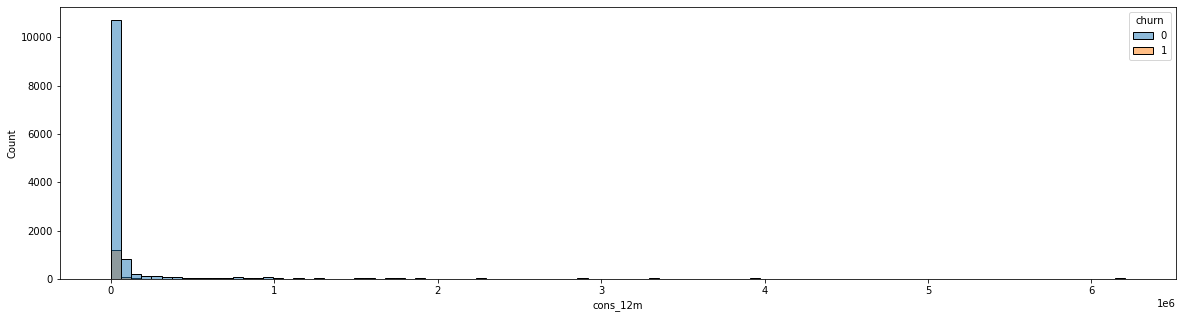

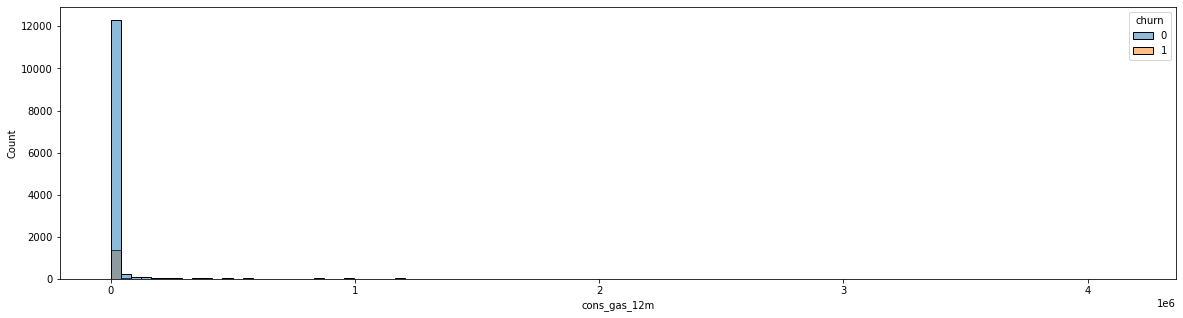

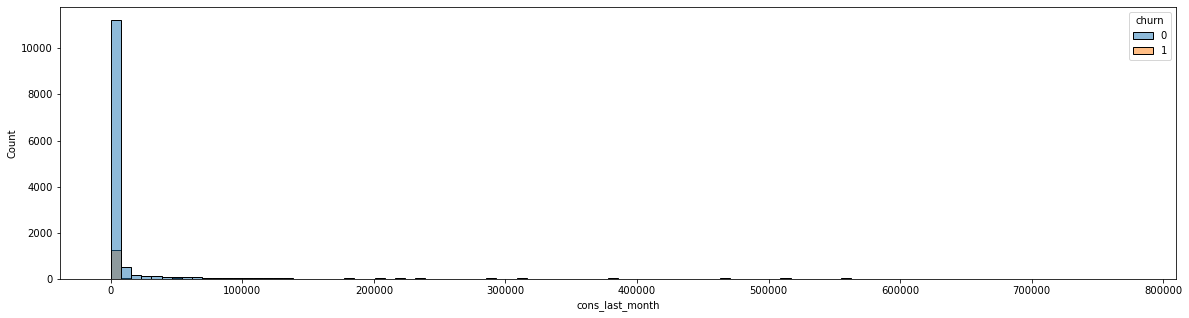

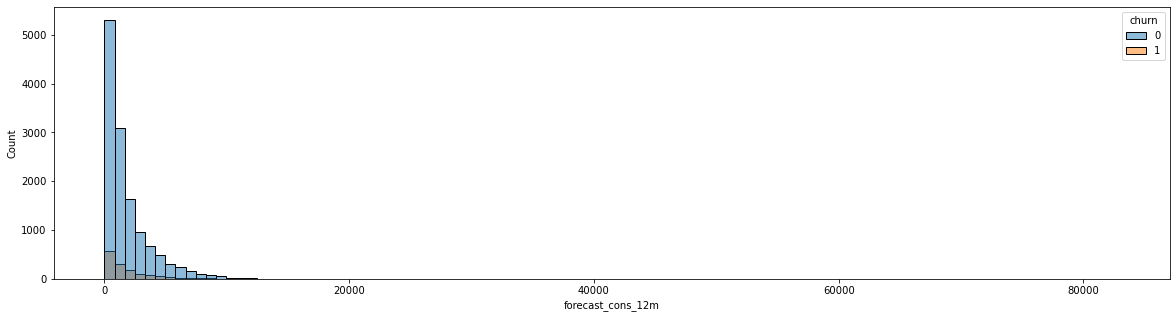

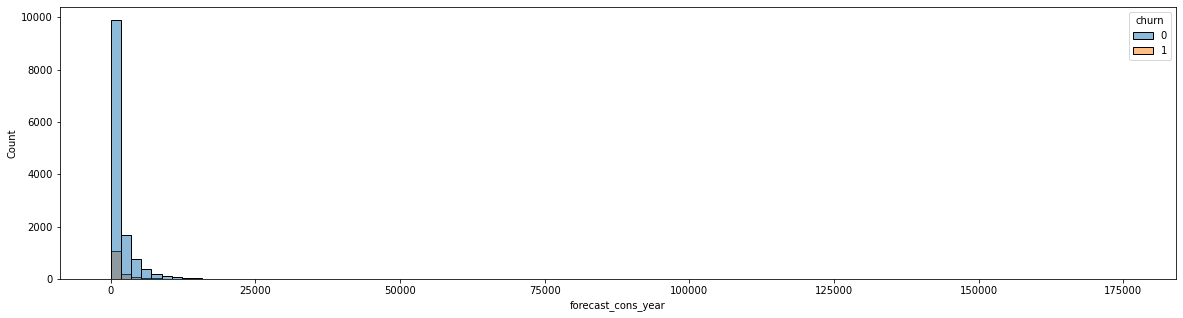

In [43]:
for attr in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

### Take a glimpse at the price dataset.

In [44]:
price_df['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

It is evident that the number of price records varies among customers, with not all customers having the same quantity. The majority of customers possess 12 price records, while a small percentage of customers have less than 9 records.

In [45]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

Furthermore, the analysis reveals that a significant portion of customers possess a 12-month price record. Fortunately, all customers have the record from the last month (2015-12-01), which will prove valuable in determining price sensitivity.

#### Plot histograms of forecast features in Price data

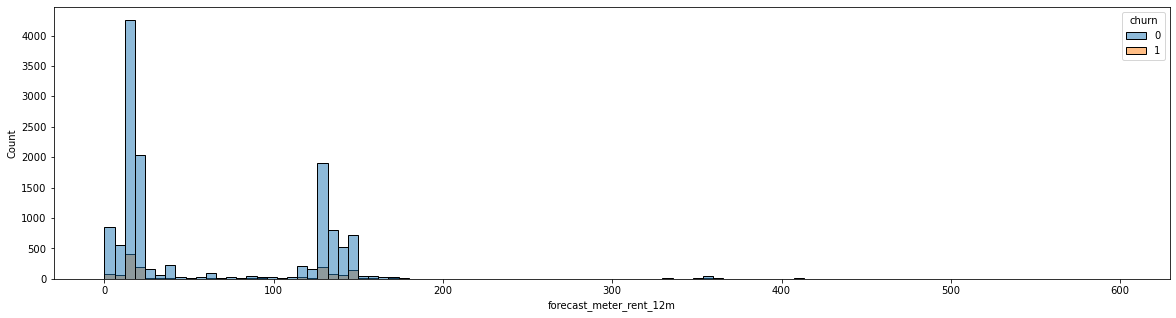

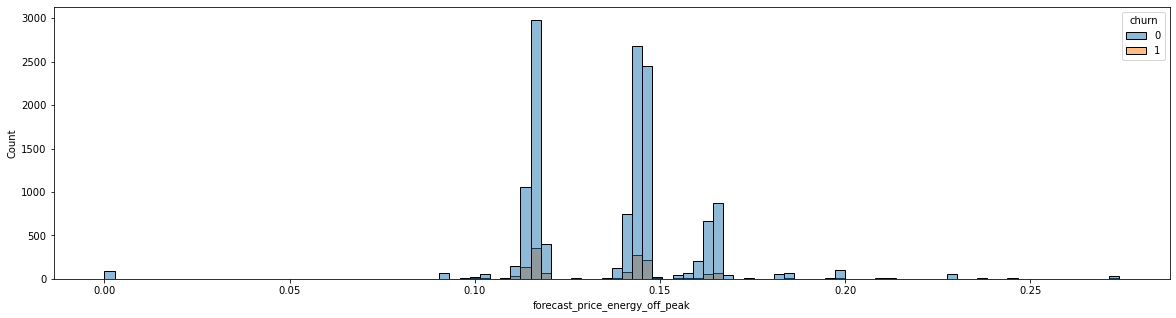

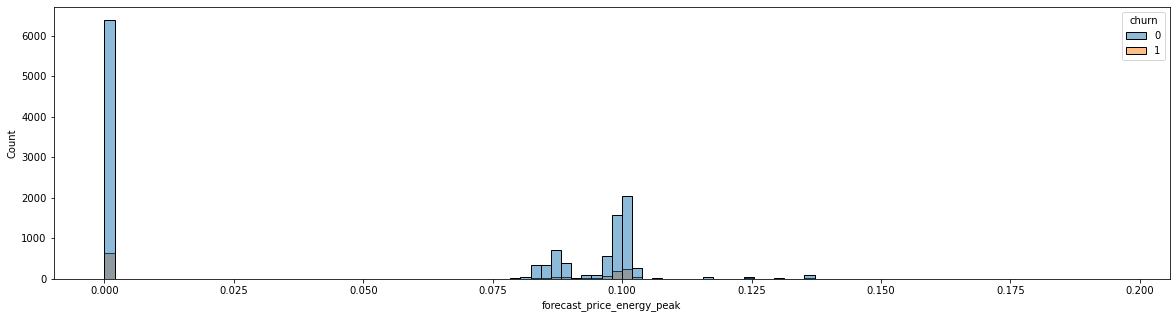

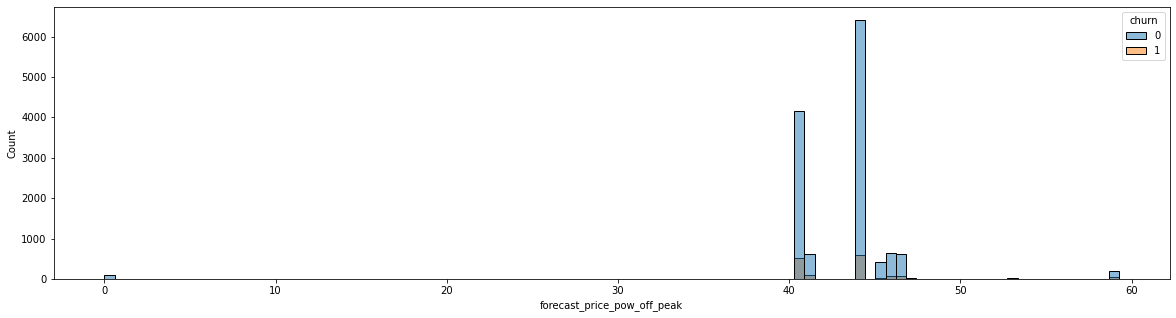

In [46]:
for attr in ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',]:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

##### Based on the provided charts, it is evident that the values of each feature exhibit a tendency to cluster around certain central points.

#### Plot histograms of power subscription features in Price data

Upon careful observation, it becomes apparent that each distribution displays a significant presence of outliers, indicated by their extended tails.

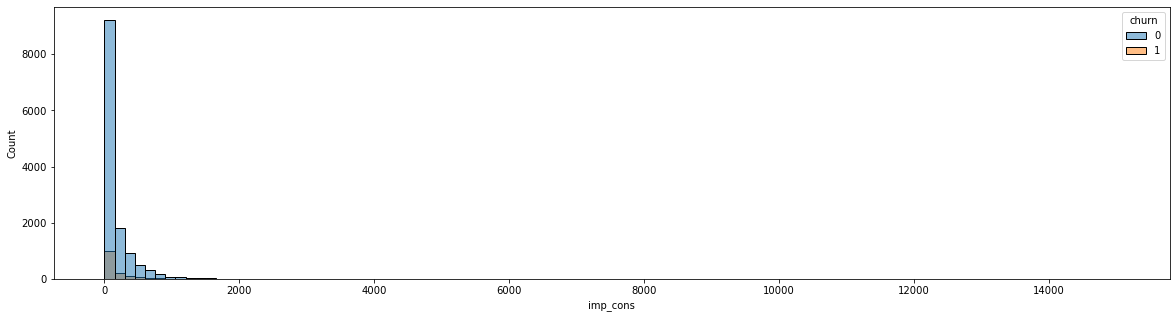

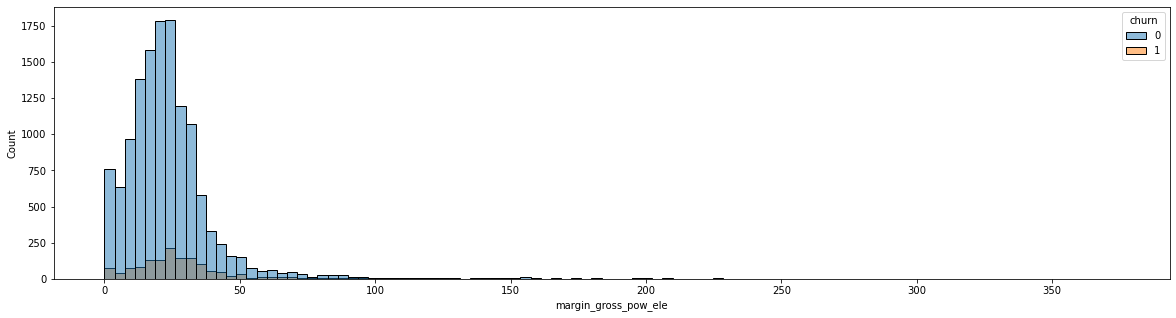

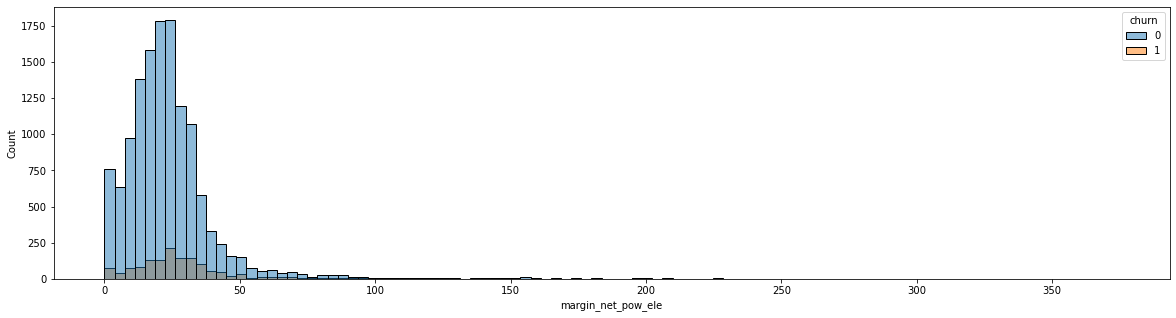

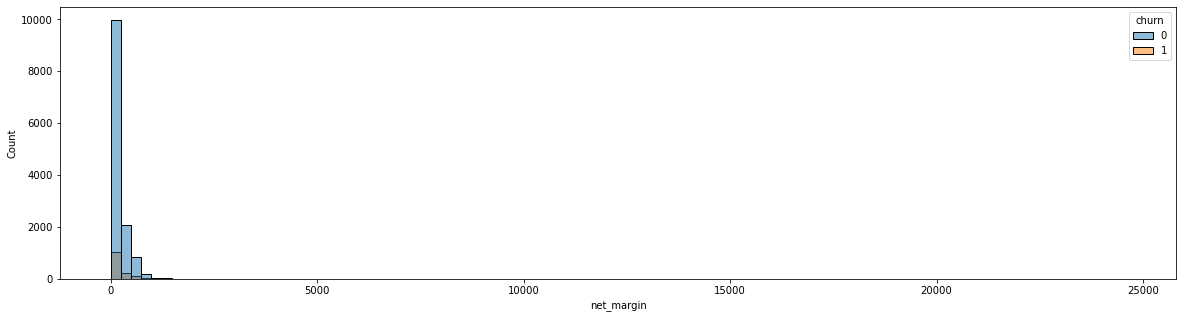

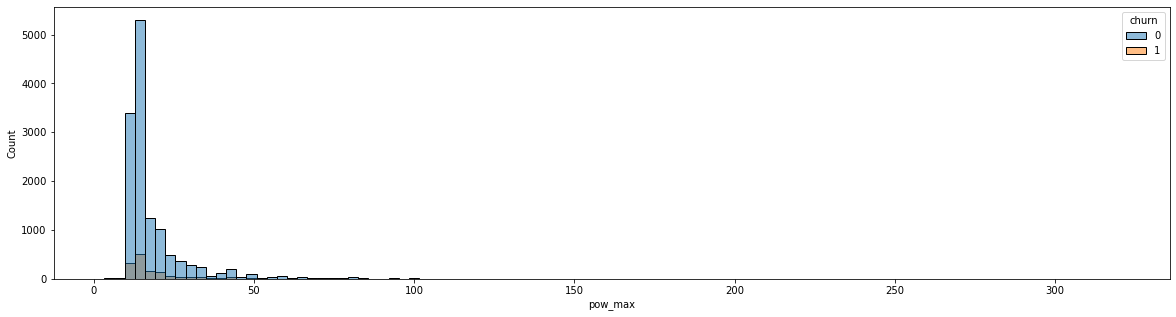

In [48]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

#### Plot histograms of price features in the price data

Let's explore the distribution of the price dataset.

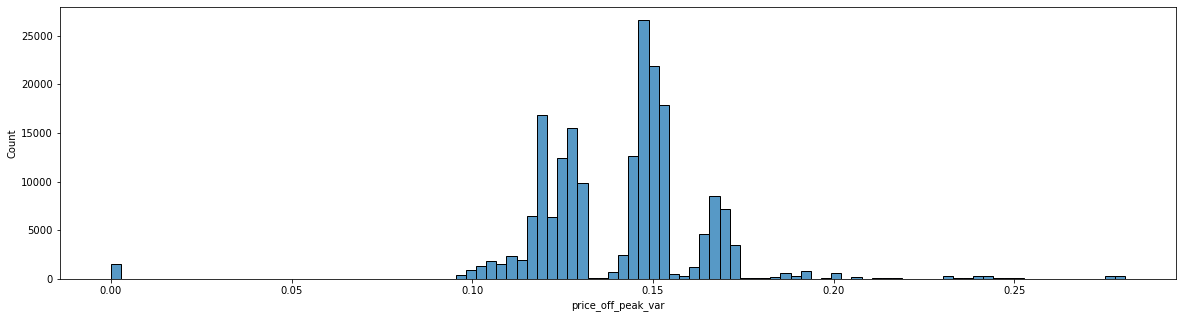

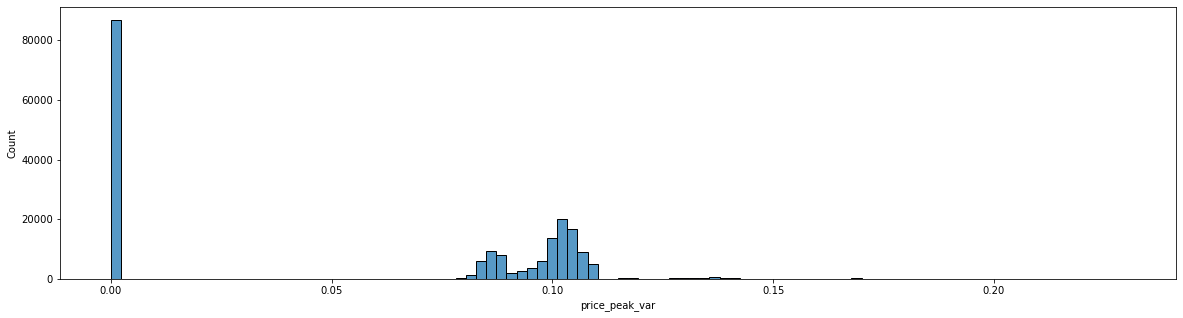

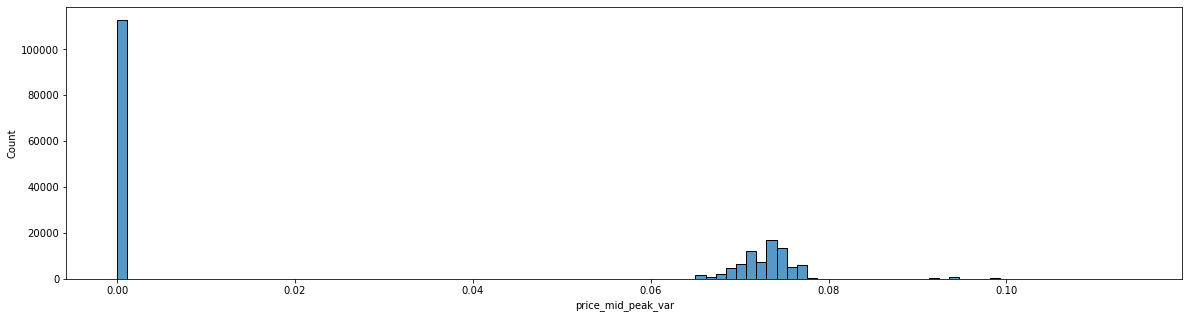

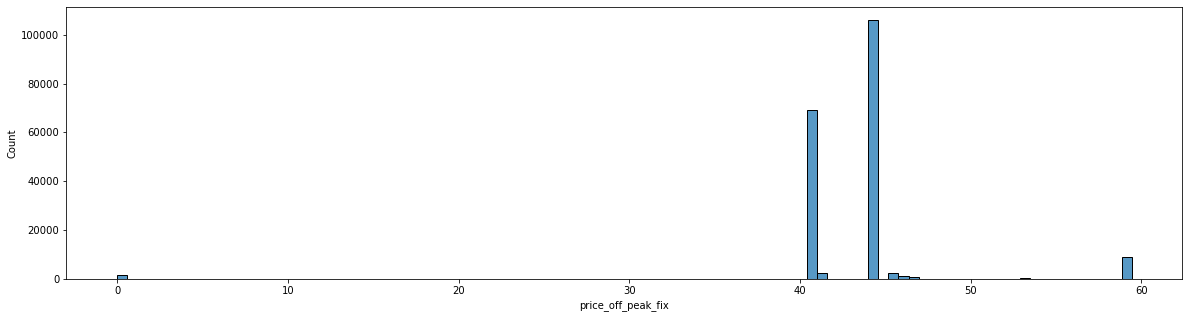

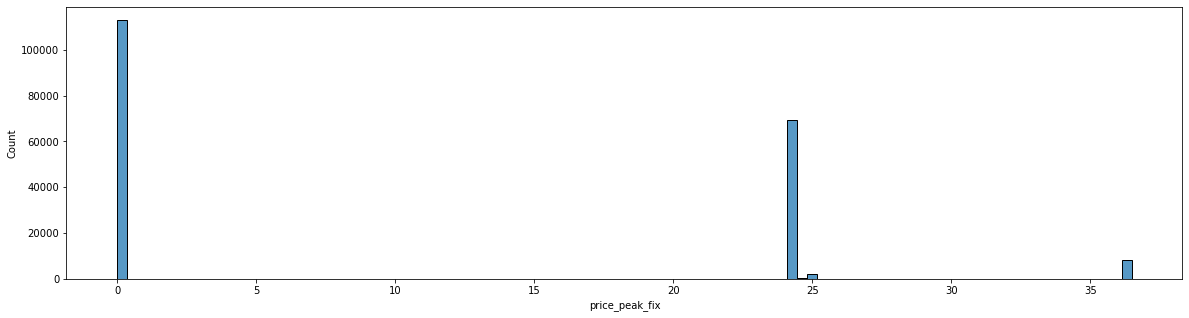

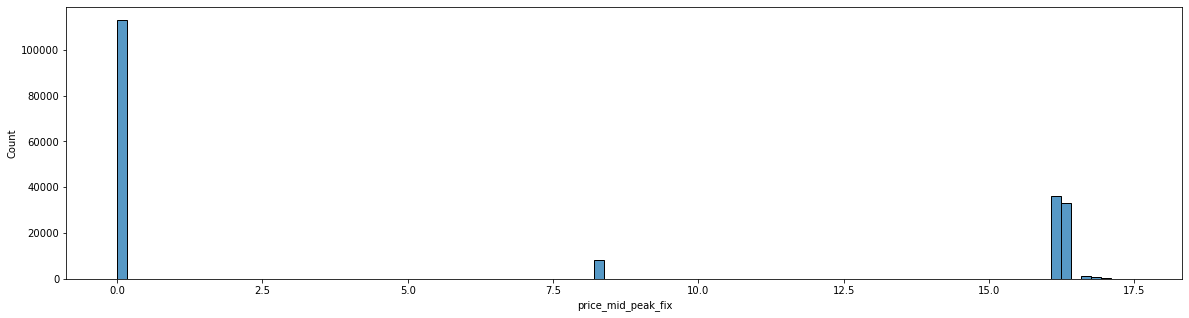

In [64]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

The analysis of the price dataset reveals a notable abundance of 0 peak prices and mid-peak prices, whereas the occurrence of 0 off-peak prices is relatively scarce. Consequently, to assess price sensitivity, I will focus on analyzing the off-peak prices exclusively.

### Hypothesis Testing

Now that we have explored the data, our next objective is to investigate the influence of price sensitivity on churn.

It is crucial to consider that in typical scenarios, when prices increase and customers switch providers, it can be inferred that these customers are sensitive to price, as the price increase triggers their churn. However, if prices decrease or remain unchanged and customers still switch providers, it cannot be definitively concluded that price sensitivity is the sole factor driving churn.

To proceed, we will establish a clear definition of price sensitivity. Utilizing the available consumption data for each company in 2015, we will create new features that quantify "price sensitivity" by calculating the maximum, minimum, and average prices over the entire year. Additionally, we will determine the most significant changes in prices that occur within a year. Furthermore, we will calculate the difference between the price of the last month (2015-12-01) and the mean price to capture recent changes in price.

To assess the impact of price changes on customer churn, we will specifically focus on off-peak prices. By analyzing churn patterns in relation to off-peak prices, we can gain insights into how price variations impact customer behavior and churn rates.

##### Calculate maximum, minimum and average prices over the whole year

In [50]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


##### Merge client dataset to the price dataset to add churn data

In [51]:
# add churn values
price_stat = price_stat.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


##### Calculate the biggest changes in prices over a whole year.

In [52]:
# 
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


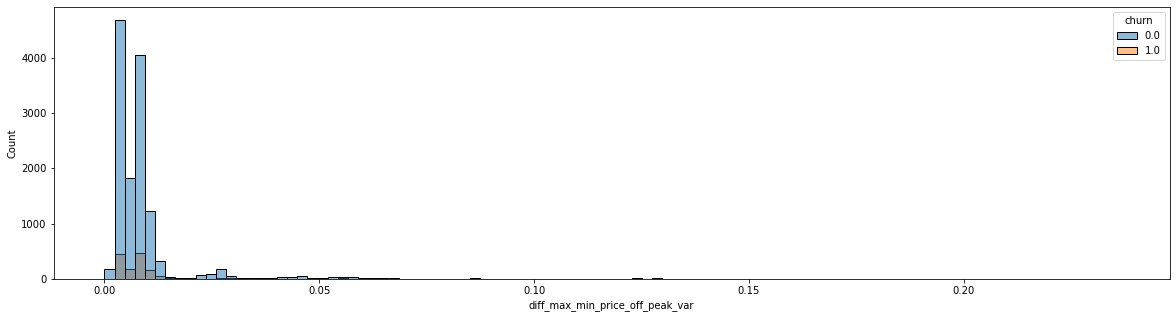

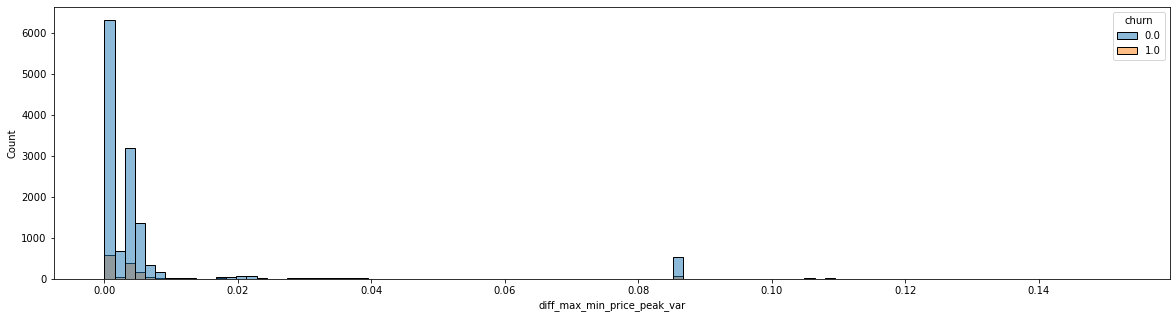

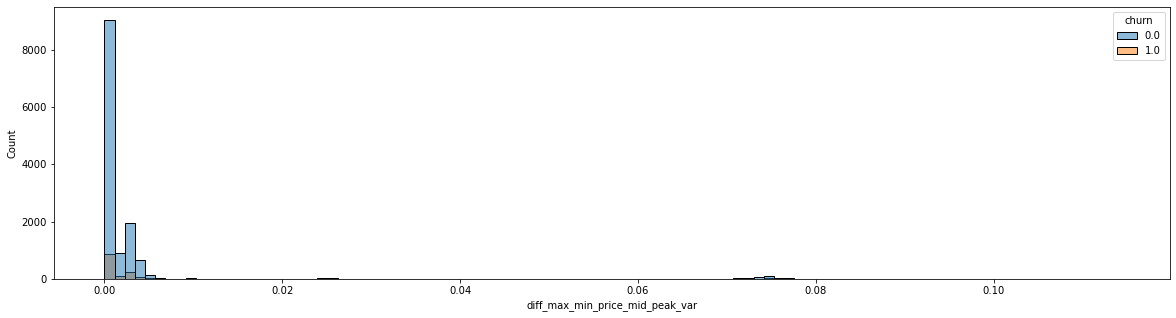

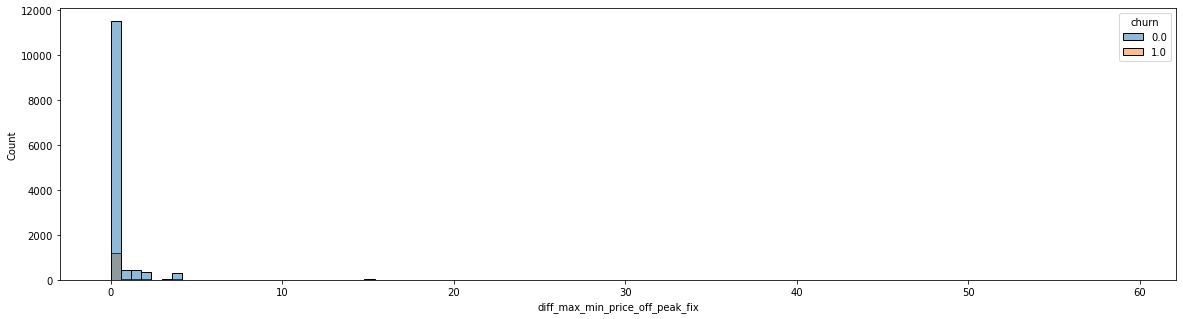

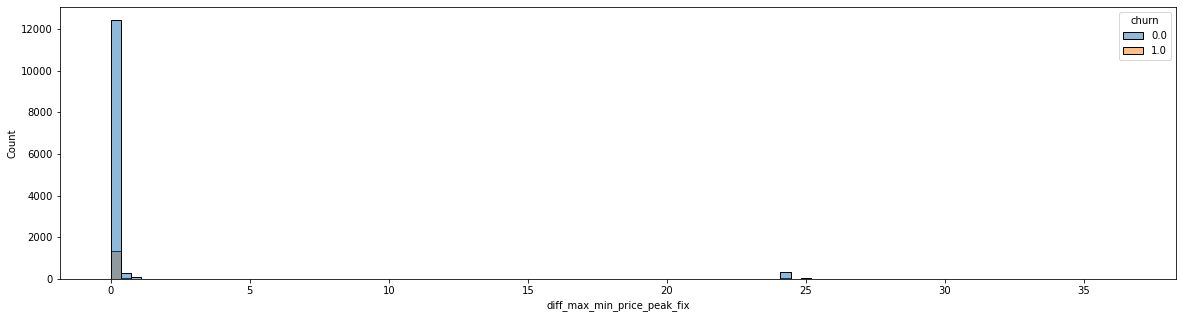

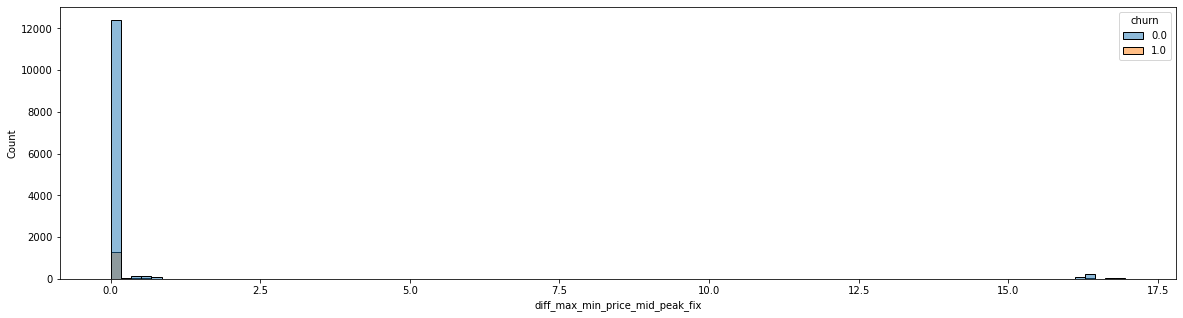

In [53]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

A significant majority of customers experienced minimal price fluctuations, indicating that their prices remained relatively stable over time.

##### Calculate the difference between the price of the last month (2015-12-01) and mean price.

In [54]:
# add diff
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166,-0.004432,-0.002121,0.000559,0.027153,0.016292,0.010861
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000,-0.002483,0.000000,0.000000,0.059260,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000,0.019722,0.000000,0.000000,0.625000,0.000000,0.000000


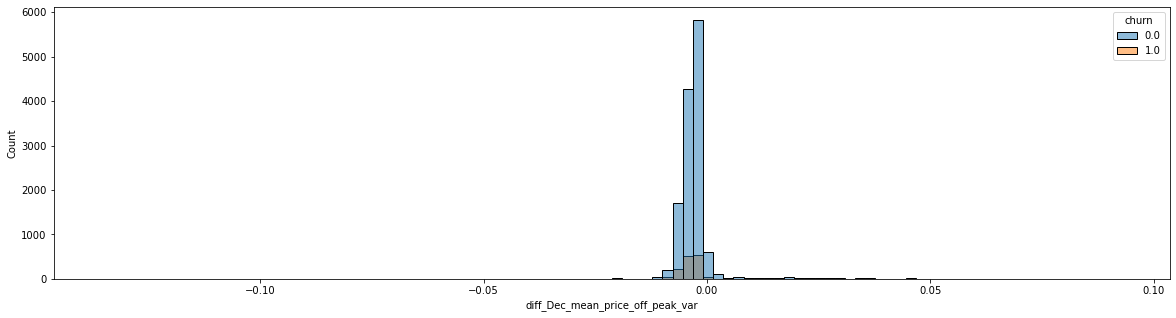

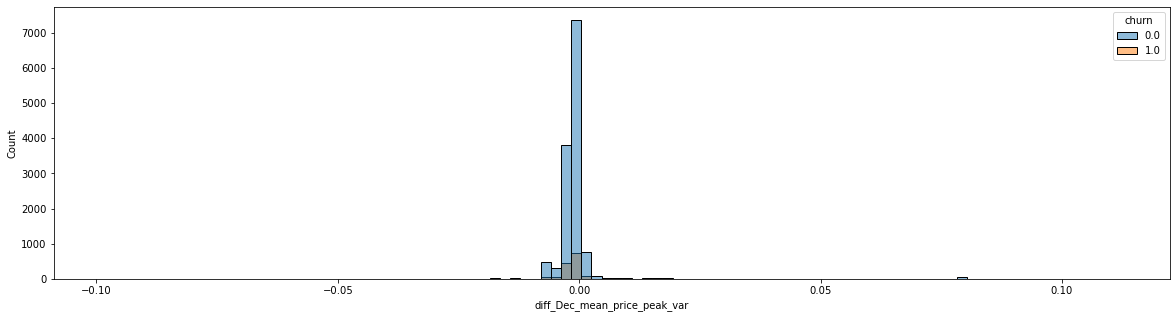

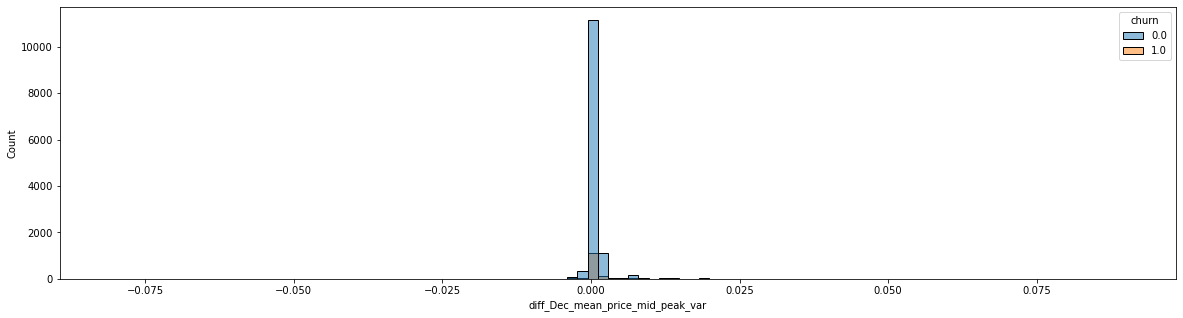

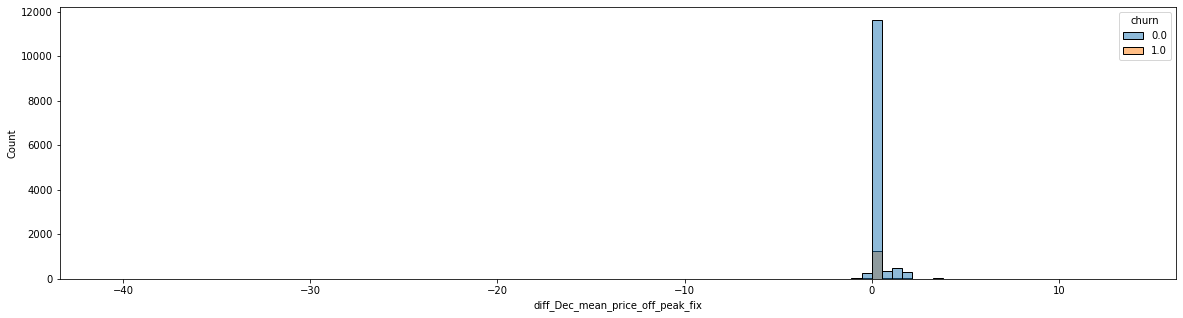

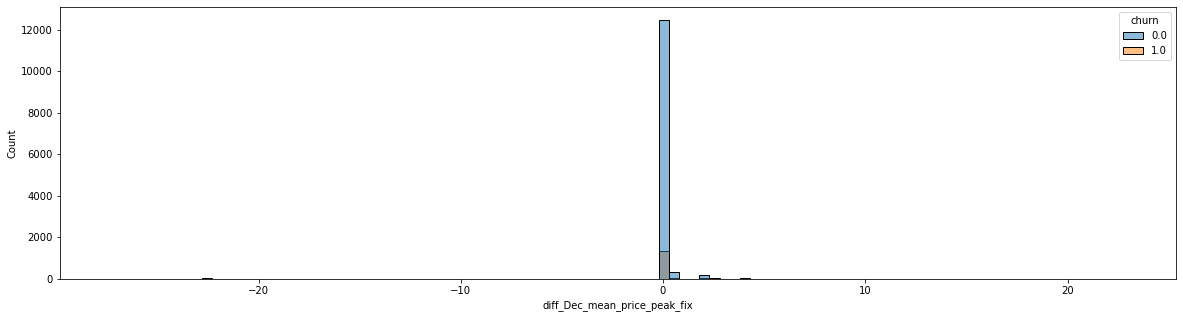

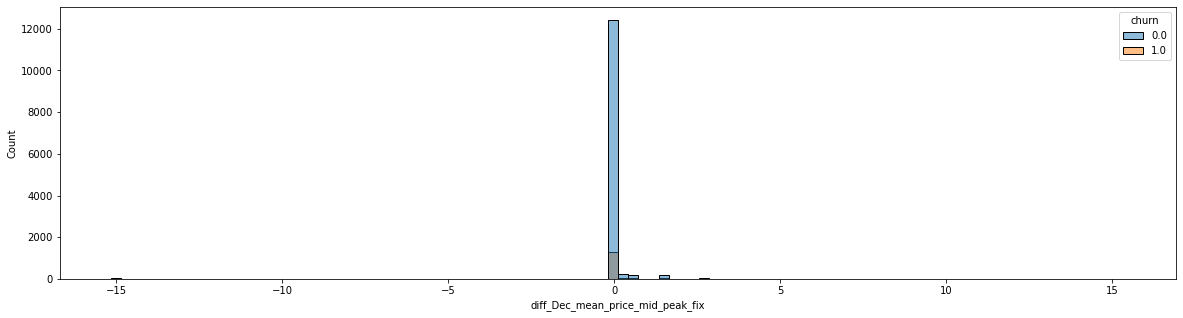

In [55]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_Dec_mean_{attr}', if_churn=True)

For the majority of customers, the prices recorded in the last month were closely aligned with the mean prices observed throughout the entire year.

##### Analyze the impact of price changes on customer churn, focusing solely on off-peak prices.

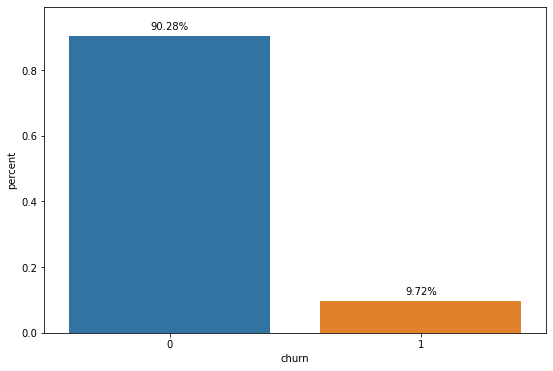

In [56]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

Among customers who experienced an increase in off-peak energy prices, approximately 9.72% of them opted to switch to different providers.

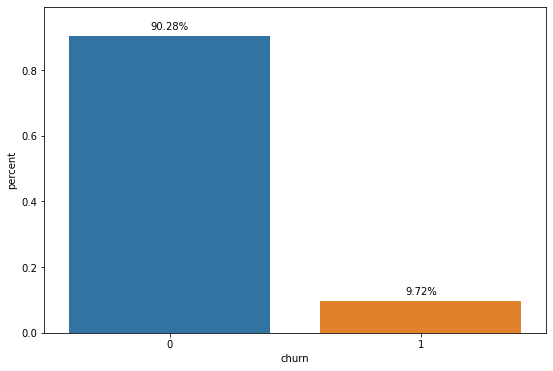

In [58]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

Among customers whose off-peak energy prices remained unchanged or experienced no variations, approximately 9.72% of them decided to switch to different providers.

###### Based on the obtained results, it is evident that regardless of the extent of price fluctuations, the proportion of customers who churned consistently remained around 9.72%. This implies that changes in prices did not have a significant impact on the customer churn rate. Therefore, it can be concluded that customers did not exhibit sensitivity to prices.


**Key findings from Hypothesis Testing**

1. Approximately 9.72% of customers opted to switch providers.

2. The numeric variables related to consumption exhibit a significant skewness.

3. It can be observed that changes in prices have no discernible impact on customer churn.

Suggestions

1. Comparison should be made between powerco price and that of its competitors. This can be achieved if we can have access to the competitor price and client data  preferably through the third party medium. If other providers give a much better offer than that of powerco, customers are more likely to transfer to new providers even if the current prices are dropped.

2. We also need to clarify what values of zero in price data represent. that is does it stand for free power or energy and what is the reason for that.

3. Improving customer satisfaction by providing excellent customer service, also implementing regular customer feedback programs can also help reduce customer churn. 

## Cracking the Code: Unleashing the Power of Feature Engineering and Modeling for Customer Churn Prediction

**Background Information**

Having delved into the data and gained a profound understanding, our team is poised to embark on the next stage of this endeavor—exploring the underlying drivers of customer churn and crafting pertinent features for our churn prediction model.

One feature that has already undergone scrutiny is the "difference between off-peak prices in December and the preceding January." Building upon this initial investigation, we will delve deeper into creative feature engineering, striving to uncover additional insightful predictors.

Our primary focus will be on implementing the price difference feature, but we won't stop there. We will endeavor to construct an array of features tailored to capture the essence of customer churn dynamics. Armed with these features, we will proceed to train a Random Forest classifier—a robust and versatile model renowned for its predictive capabilities—to anticipate customer churn. 

Evaluating the model's performance will be of utmost importance, employing appropriate evaluation metrics to gauge its efficacy accurately. Each decision made along the way will be thoroughly justified, ensuring the utmost transparency and reliability in our approach.

Additionally, if time permits, we will explore the client's proposed discounting strategy, entailing a 20% discount for customers exhibiting a high propensity to churn. This investigation will shed light on the potential effectiveness and viability of such a strategy.

Let us now dive into the assigned tasks and bring the predictive power of feature engineering and modeling to the realm of customer churn prediction.

**Sub-Task 1: Constructing the "difference between off-peak prices in December and January" feature**

We will meticulously calculate the disparity in off-peak prices between December and the preceding January for each customer. This feature will provide valuable insights into potential correlations between pricing dynamics and churn behavior.

**Sub-Task 2: Unleashing the predictive might with our churn prediction model**

Once we have harnessed the transformative potential of feature engineering, we will proceed to train a Random Forest classifier—a stalwart in the realm of machine learning algorithms—for customer churn prediction. This ensemble model, renowned for its robustness and ability to handle complex relationships, will serve as our predictive powerhouse.

To ascertain the model's effectiveness, we will diligently evaluate its performance using appropriate evaluation metrics. This rigorous assessment will facilitate a comprehensive understanding of the model's capabilities, enabling us to fine-tune and optimize its predictive prowess.



In [65]:
# load packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [66]:
# drop irrelevant columns
train_data = client_df.copy()
train_data['year_modif_prod'] = train_data['date_modif_prod'].dt.year
train_data['year_renewal'] = train_data['date_renewal'].dt.year
train_data = train_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
train_data['has_gas'] = has_gas_encoder.fit_transform(train_data['has_gas'])
# add new feature "diff_dec_jan_off_peak_var" and "diff_dec_jan_off_peak_fix". I just calculate the differnece between last price and first price for each customer.
diff_dec_jan_off_peak_var = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
train_data = train_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
train_data = train_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')
# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    train_data = train_data.merge(diff_dec_jan_temp, on='id', how='left')
# add price changing trends
train_data = train_data.merge(price_stat[['id','diff_Dec_mean_price_off_peak_var','diff_Dec_mean_price_off_peak_fix',
                                          'diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
                                          'diff_Dec_mean_price_mid_peak_var','diff_Dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#
train_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,year_modif_prod,year_renewal,diff_dec_jan_off_peak_var,diff_dec_jan_off_peak_fix,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016,2015,2015,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,0.021246,3.324664,-0.015266,-22.352010,-0.066530,-14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016,2009,2015,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,-0.002009,0.133335,-0.007124,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016,2010,2015,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,-0.002714,0.059260,-0.000012,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016,2010,2015,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,-0.002624,0.044445,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,2,19.800,0,2010,2016,2010,2015,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,-0.004268,0.040729,-0.001965,0.024437,0.000854,0.016292


Generate training data and corresponding training labels.

Please note the following guidelines specific to tree-based models:

1. Data scaling is not required for tree-based models. Unlike other machine learning models, you do not need to normalize or standardize the features.

2. Instead of applying one-hot encoding to process categorical variables, utilize label encoding. Convert categorical variables into numeric variables using label encoding, as tree-based models can directly handle categorical variables in their original form.

These considerations will ensure the appropriate handling of data preprocessing for tree-based models.

### Data sampling

In [67]:
X = train_data.drop(columns=['id','churn'])
y = train_data['churn']
X.shape, y.shape

((14606, 36), (14606,))

### Build a RandomForest model
    
In this scenario, we will not have a separate testing dataset. Instead, we will employ the "out-of-fold" cross-validation strategy to evaluate the performance of the model. Given the imbalanced nature of the training dataset, accuracy alone is not a suitable metric for assessing the model's performance. Instead, we will focus on precision and recall as the evaluation metrics. However, the accuracy results will still be displayed for reference purposes, but they will not be used as the primary measure of the model's performance.

Since the objective of this task is not to find the optimal model parameters, we will not perform parameter tuning. Our main focus will be on building and evaluating the model based on the existing parameter settings.

In [71]:
# 
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # pred training labels
feature_importance_df = pd.DataFrame(data={'feature_name':X.columns, 'feature_importance':[0]*len(X.columns)})
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    rf = RandomForestClassifier(random_state=56)
    # train model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    feature_importance_df['feature_importance'] = feature_importance_df['feature_importance'] + (rf.feature_importances_)
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.714 Recall 0.053 Accuracy 0.906
Fold 2 Precision 0.885 Recall 0.081 Accuracy 0.910
Fold 3 Precision 0.895 Recall 0.060 Accuracy 0.908
Fold 4 Precision 0.944 Recall 0.060 Accuracy 0.908
Fold 5 Precision 0.850 Recall 0.060 Accuracy 0.908
Total  Precision 0.856 Recall 0.063 Accuracy 0.908


In [77]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13187
           1       0.86      0.06      0.12      1419

    accuracy                           0.91     14606
   macro avg       0.88      0.53      0.53     14606
weighted avg       0.90      0.91      0.87     14606



In [81]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y, pred_y).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 89
False positives: 15
True negatives: 13172
False negatives: 1330



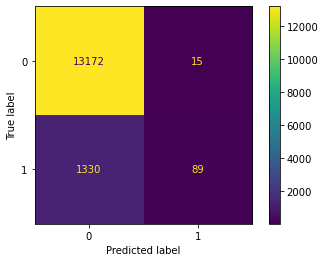

In [75]:
cm = confusion_matrix(y, pred_y, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

Upon reviewing the presented results, several noteworthy observations can be made:

1. Churn Distribution: In the test set, approximately 9.7% of the rows correspond to churners (churn = 1), which amounts to 1419 instances. Understanding the distribution helps provide context for evaluating the model's performance.

2. True Negatives: Out of all the negative cases (churn = 0), the model correctly predicted 13172 out of 13187 as negative, resulting in a high number of true negatives. This indicates that the model performs well in identifying customers who are likely to continue using the service.

3. False Negatives: The model incorrectly identified 1330 cases as non-churners (churn = 0) when, in fact, they had churned (churn = 1). The relatively high number of false negatives suggests that the model struggles to identify customers who are likely to churn. Addressing this issue is crucial for improving the model's performance.

4. False Positives: The model predicted 15 cases as churners (churn = 1) when they actually did not churn (churn = 0). The low number of false positives indicates that the model performs reasonably well in not misclassifying customers who are likely to continue using the service.

5. True Positives: Out of the total 1419 churners in the test dataset, the model only correctly identified 89 of them as churners. This poor performance in correctly identifying positive cases is a significant concern and requires improvement.

6. Accuracy vs. Precision and Recall: While the accuracy score appears high at 90%, it can be misleading in this case as it prioritizes correctly predicting the negative class over the positive class. Precision and recall metrics provide a clearer picture of the model's performance.

7. Precision Score: The precision score, calculated at 0.85, indicates that when the model predicts a customer as a churner, approximately 85% of the time, it is correct. While this score is not bad, there is still room for improvement.

8. Recall Score: The recall score, at 0.63, demonstrates that the classifier has a limited ability to identify positive samples or churners. It is crucial to address this issue as the model fails to capture a significant number of customers who actually churned.

Based on the provided evaluation, the model's performance is deemed poor, particularly in correctly identifying churners. While the model shows high accuracy, it is primarily driven by its ability to predict non-churners accurately. To improve the model, it is necessary to focus on feature engineering and create more informative features that can better distinguish between churners and non-churners. Additionally, optimizing the model's parameters and exploring different algorithms may also contribute to enhancing its performance.

### Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

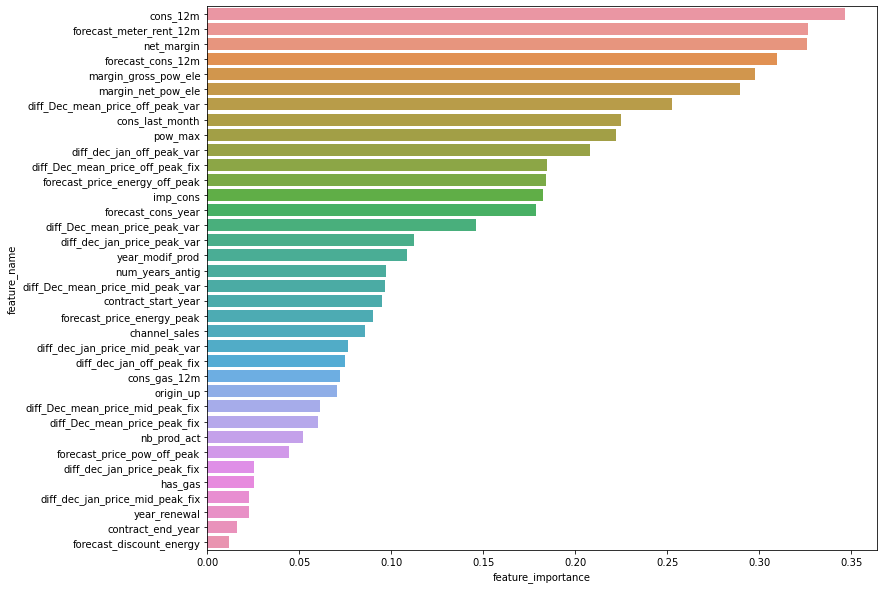

In [82]:
#plot feature importance
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(data=feature_importance_df.sort_values(by=['feature_importance'], ascending=False), y='feature_name', x='feature_importance')

Based on the insights derived from the chart, the following observations can be made:

- Consumption over 12 months, forecasted bill of meter rent for the next 12 months, and net margin are the primary drivers of churn in this model.
- Gross and net margin on power subscription also significantly influence the churn rate.
- Our price sensitivity features are among the top 10 influential drivers for customer churn in this model.

The last observation is particularly important as it relates back to our original hypothesis:

"Is churn driven by the customers' price sensitivity?"

Based on the output of the feature importances, price sensitivity is not identified as one of the top drivers, and it does not significantly contribute to churning. However, to arrive at a conclusive result, further experimentation is needed to investigate the relationship between price sensitivity and churn more thoroughly.

### Evaluating the Impact of a 20% Discount on Customer Churn Rate

The task at hand poses a multifaceted challenge that warrants careful consideration. Upon our initial analysis, we have discerned that changes in pricing alone might not exert a significant influence on customer churn. Consequently, it becomes unlikely that a discount, in isolation, would prove effective in curtailing churn rates.

Furthermore, the inherent uncertainty surrounding the future adds a layer of complexity to precisely gauging the impact of a discount on customer churn. The intricacies of customer behavior and the dynamic nature of market conditions make it arduous to draw definitive and unequivocal conclusions.

In light of these challenges, a prudent approach to understanding the impact of a discount involves assessing the expected profit derived from considering the probability of customer churn. By factoring in the likelihood of churn and potential revenue loss, we can delve into the potential effect of implementing a discount strategy on the overall profitability of the business. This comprehensive analysis yields valuable insights into the potential ramifications of the discount, thus guiding informed decision-making.

While we acknowledge the intricacy of unraveling the precise impact of a discount on customer churn, our analytical framework empowers us to navigate this complexity. By considering the interplay of probabilities, revenue implications, and profitability, we can shed light on the potential outcomes of implementing a 20% discount strategy. These insights serve as a valuable compass for decision-makers as they chart a course forward, striking a delicate balance between customer retention efforts and the financial sustainability of the business.

In [84]:
prob_no_discount = pd.DataFrame(data = pred_train_labels, columns=['0', '1'])
prob_no_discount['id'] = train_data['id']
prob_no_discount = prob_no_discount[['id','0','1']]
prob_no_discount

,id,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,0.66,0.34
1,d29c2c54acc38ff3c0614d0a653813dd,0.95,0.05
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11
3,bba03439a292a1e166f80264c16191cb,0.84,0.16
4,149d57cf92fc41cf94415803a877cb4b,0.99,0.01
...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.90,0.10
14602,d0a6f71671571ed83b2645d23af6de00,0.41,0.59
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.86,0.14
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.93,0.07


<font size="3">**We need to predcit the probability of churn when applying a 20% discount. Note: I still use the data on this year, not the next year.**

In [85]:
# drop useless columns
test_data = client_df.copy()
test_data['year_modif_prod'] = test_data['date_modif_prod'].dt.year
test_data['year_renewal'] = test_data['date_renewal'].dt.year
test_data = test_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])

#encode has_gas feature
has_gas_encoder = LabelEncoder()
test_data['has_gas'] = has_gas_encoder.fit_transform(test_data['has_gas'])

# apply a 20% discount
diff_dec_jan_off_peak_var = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1)*0.8 - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)*0.8
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1)*0.8 - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)*0.8
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
test_data = test_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
test_data = test_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')

# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1)*0.8 - price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)*0.8
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    test_data = test_data.merge(diff_dec_jan_temp, on='id', how='left')

# add price changing trends
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat_test = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': ['mean'], 'price_peak_var': ['mean'], 'price_mid_peak_var': ['mean'],
                                                      'price_off_peak_fix': ['mean'], 'price_peak_fix': ['mean'], 'price_mid_peak_fix': ['mean'],})

# flatten the column names
price_stat_test.columns = ['_'.join(x) for x in zip(price_stat_test.columns.get_level_values(0), price_stat_test.columns.get_level_values(1))]
price_stat_test = price_stat_test.reset_index()

# add diff
for attr in price_attr:
    price_stat_test[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat_test['id'])].groupby(['id'])[attr].nth(-1).values*0.8 - price_stat_test[f'{attr}_mean']*0.8

#merge test_data with price_stat_test data
test_data = test_data.merge(price_stat_test[['id','diff_Dec_mean_price_off_peak_var','diff_Dec_mean_price_off_peak_fix',
                                          'diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
                                          'diff_Dec_mean_price_mid_peak_var','diff_Dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#print
test_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,year_modif_prod,year_renewal,diff_dec_jan_off_peak_var,diff_dec_jan_off_peak_fix,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016,2015,2015,0.016046,2.960768,-0.014330,-19.471665,-0.057229,-12.981111,0.016997,2.659732,-0.012213,-17.881608,-0.053224,-11.921072
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016,2009,2015,-0.003014,0.142223,0.000000,0.000000,0.000000,0.000000,-0.001607,0.106668,-0.005699,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016,2010,2015,-0.003736,0.142223,0.000422,0.000000,0.000000,0.000000,-0.002171,0.047408,-0.000010,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016,2010,2015,-0.003638,0.142223,0.000000,0.000000,0.000000,0.000000,-0.002099,0.035556,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,2,19.800,0,2010,2016,2010,2015,-0.004954,0.130332,-0.001842,0.078199,0.002790,0.052133,-0.003415,0.032583,-0.001572,0.019550,0.000683,0.013033


In [86]:
#create train data
testing_set = test_data.drop(columns=['id','churn'])
testing_set.shape

(14606, 36)

In [87]:
# 
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # predict training labels
pred_test_labels = np.zeros(shape=(testing_set.shape[0], 2))

# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # build model
    rf = RandomForestClassifier(random_state=56)
    
    # train and fit model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    pred_test_labels += rf.predict_proba(testing_set)/5
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1

# 
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.714 Recall 0.053 Accuracy 0.906
Fold 2 Precision 0.885 Recall 0.081 Accuracy 0.910
Fold 3 Precision 0.895 Recall 0.060 Accuracy 0.908
Fold 4 Precision 0.944 Recall 0.060 Accuracy 0.908
Fold 5 Precision 0.850 Recall 0.060 Accuracy 0.908
Total  Precision 0.856 Recall 0.063 Accuracy 0.908


<font size="3"> Now, combine all results into a single dataset.

In [88]:
#create a new dataframe for the results
prob_discount = pd.DataFrame(data=pred_test_labels, columns=['0_dis','1_dis'])
customer_prob = prob_no_discount.join(prob_discount)
customer_prob.head()

,id,0,1,0_dis,1_dis
0,24011ae4ebbe3035111d65fa7c15bc57,0.66,0.34,0.422,0.578
1,d29c2c54acc38ff3c0614d0a653813dd,0.95,0.05,0.948,0.052
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11,0.888,0.112
3,bba03439a292a1e166f80264c16191cb,0.84,0.16,0.936,0.064
4,149d57cf92fc41cf94415803a877cb4b,0.99,0.01,0.970,0.030


<font size="3"> **Then, let's calculate the expected profit from customers.**

In [89]:
# calculate expected profit of a single customer with discounted prices and without discounted prices
def expect_from_a_customer(customer_id):
    # expected values without discount
    average_yearly_price_var = price_stat[price_stat['id']==customer_id]['price_off_peak_var_mean'].values[0]
    total_yearly_usage_var = client_df[client_df['id']==customer_id]['cons_12m'].values[0]
    average_yearly_price_fix = price_stat[price_stat['id']==customer_id]['price_off_peak_fix_mean'].values[0]
    total_yearly_usage_fix = client_df[client_df['id']==customer_id]['cons_gas_12m'].values[0]
    total_profit = average_yearly_price_var*total_yearly_usage_var + average_yearly_price_fix*total_yearly_usage_fix
   
    #get expected profit of customer  
    prob_stay = customer_prob[customer_prob['id']==customer_id]['0'].values[0]
    expected_profit = prob_stay*total_profit
    
    # total profit with discount
    total_profit_dis = total_profit*0.8
    
    # get expected profit of customer when given discount 
    prob_stay_dis = customer_prob[customer_prob['id']==customer_id]['0_dis'].values[0]
    expected_profit_dis = prob_stay_dis*total_profit_dis
    return expected_profit, expected_profit_dis

In [90]:
# Calculate expected profit from each customer with and without discount
expected_no_dis, expected_dis = [],[]
for cus_id in customer_prob['id']:
    temp = expect_from_a_customer(customer_id=cus_id)
    expected_no_dis.append(temp[0])
    expected_dis.append(temp[1])
#
customer_prob['expected_no_dis'] = expected_no_dis
customer_prob['expected_dis'] = expected_dis
customer_prob['diff_discount'] = customer_prob['expected_dis'] - customer_prob['expected_no_dis']
customer_prob

,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
0,24011ae4ebbe3035111d65fa7c15bc57,0.66,0.34,0.422,0.578,1.484745e+06,7.594696e+05,-725275.463026
1,d29c2c54acc38ff3c0614d0a653813dd,0.95,0.05,0.948,0.052,6.623187e+02,5.287395e+02,-133.579219
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11,0.888,0.112,8.255493e+01,6.589553e+01,-16.659399
3,bba03439a292a1e166f80264c16191cb,0.84,0.16,0.936,0.064,2.011941e+02,1.793502e+02,-21.843930
4,149d57cf92fc41cf94415803a877cb4b,0.99,0.01,0.970,0.030,5.439767e+02,4.263898e+02,-117.586885
...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.90,0.10,0.936,0.064,1.918601e+06,1.596276e+06,-322325.008098
14602,d0a6f71671571ed83b2645d23af6de00,0.41,0.59,0.386,0.614,3.162780e+02,2.382113e+02,-78.066670
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.86,0.14,0.596,0.404,1.971808e+02,1.093207e+02,-87.860111
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.93,0.07,0.932,0.068,1.822685e+01,1.461284e+01,-3.614013


In [91]:
customer_prob[customer_prob['diff_discount']>0]

,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
128,3c4ee938001975a4d07cf27a54de433c,0.67,0.33,0.888,0.112,3254.731758,3450.987225,196.255467
139,cf8c5db0c02e3f92592daccba41c918c,0.60,0.40,0.782,0.218,501505.138799,522902.691387,21397.552589
217,b1e773762052b38569b1e68aaa10576e,0.39,0.61,0.576,0.424,2692.006048,3180.708684,488.702636
230,9ca6298400dbc960a48a46aa6abd3db7,0.25,0.75,0.354,0.646,2565.754701,2906.486925,340.732224
346,395a6f41bbd1a0f23a64f00645264e78,0.64,0.36,0.818,0.182,4439.209887,4539.092109,99.882222
...,...,...,...,...,...,...,...,...
14384,87ec37604794b702c77225967c20f476,0.64,0.36,0.864,0.136,215.637276,232.888258,17.250982
14536,acfb0c97e40a86087f185d4846217966,0.68,0.32,0.862,0.138,213950.664602,216971.144572,3020.479971
14537,d77e823d24aa59beda5baa6bca37c903,0.63,0.37,0.846,0.154,264.275878,283.907801,19.631922
14561,37f06f14bb662b84f4f464322dce72db,0.68,0.32,0.878,0.122,1118.446236,1155.289171,36.842935


In [92]:
customer_prob[customer_prob['diff_discount']>0].shape[0]/len(customer_prob)

0.023894290017800905

<font size="3">Based on our analysis, A small percentage of customers (2%) are expected to have a discount difference greater than 0 after being offered discounted prices.

In [93]:
# number of churning customers
customer_prob[(customer_prob['1']>0.5)].shape[0]

104

In [94]:
# Among the churning customers the number of customers whose expected profit increase after offering them discount
customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)].shape[0]

61

In [95]:
# Among the churning customers the number of customers whose expected profit decrease after offering them discount
customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)].shape[0]

43

In [99]:
# total extra profit based on customers whose expected profit increased
round(customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)]['diff_discount'].sum())

2250002

In [100]:
# total extra profit based on customers whose expected profit did not increase
round(customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)]['diff_discount'].sum())

-1138753

In [101]:
# total extra profit from predicted churning customers after offering them discount
round(customer_prob[customer_prob['1']>0.5]['diff_discount'].sum())

1111249


### Summary: Evaluating the Impact of a 20% Discount on Customer Churn

In our evaluation of the impact of a 20% discount on customer churn, we focused on a group of 104 predicted churning customers. Here are the key findings:

- Among the 104 predicted churning customers, we observed a mixed impact when offering discounted prices.
- Out of these customers, 61 are expected to generate an increased profit, resulting in a total expected profit increase of 2,250,001.
- Conversely, 43 customers are anticipated to yield a decreased profit, leading to a total expected profit decrease of 1,138,753.
- Overall, when considering both positive and negative impacts, offering a discount to the predicted churning customers has the potential to generate an additional profit of 1,111,248.

In conclusion, our analysis reveals that offering discounted prices to the predicted churning customers can result in varying outcomes in terms of expected profit. While 61 customers are projected to contribute to an increased profit, 43 customers may lead to a reduced profit. When considering the net impact, the discount strategy shows the potential to generate an overall additional profit of 1,111,248.

It is important to note that the implementation of a discount strategy should be accompanied by a comprehensive understanding of the specific circumstances and potential risks involved. Further analysis and evaluation are recommended to ensure a thorough assessment of the potential benefits and implications before making any strategic decisions.

In [102]:
customer_prob.to_csv('churnproba_predictions.csv')


In [103]:
testing_set.to_csv('probatest_data.csv')